<a href="https://colab.research.google.com/github/hacksJuanDavid/ClassificationPilotsInF1/blob/main/ClassificationPilotsInF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias usadas

In [ ]:
import pandas as pd # Library for view data in tables 2d and 3d
import numpy as np # Library for manipulation large data and mathematics
import matplotlib.pyplot as plt # Library for view data in charts
from sklearn.metrics import roc_curve, roc_auc_score # Library for view data in charts
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Library for view data in charts
from google.colab import files # Library for export csv
from sklearn.model_selection import train_test_split # Library for train model test
from sklearn.ensemble import RandomForestClassifier # Library for model RandomForestClassifier
from sklearn.datasets import make_classification # Library for implement neurnal red MLP
from sklearn.metrics import accuracy_score, classification_report # Library for evaluate model

## Generacion de datos de manera aletoria tomando en cuanta una asignacion de clase para los pilos basada en puntos para indicar una media de si realmente es novato o experto

In [ ]:
# Define number of rows for creating data
num_rows = 10000

# Create data random for columns
data = {
    "tiempo_promedio_vuelta": np.round(np.random.uniform(60, 90, num_rows), 2),
    "velocidad_maxima": np.round(np.random.uniform(280, 380, num_rows), 2),
    "velocidad_minima": np.round(np.random.uniform(100, 170, num_rows), 2),
    "consistencia_tiempos_vuelta": np.round(np.random.uniform(0.5, 5.0, num_rows), 2),
    "anos_experiencia_f1": np.random.randint(0, 20, num_rows),
    "carreras_completadas": np.random.randint(0, 300, num_rows),
    "posicion_promedio_carreras": np.round(np.random.uniform(1, 30, num_rows), 2),
    "numero_victorias": np.random.randint(0, 200, num_rows),
    "numero_incidentes_accidentes": np.random.randint(0, 100, num_rows),
    "calidad_coche": np.round(np.random.uniform(0.0, 10.0, num_rows), 2),
    "calidad_estrategia": np.round(np.random.uniform(0.0, 10.0, num_rows), 2),
    "calidad_equipo": np.round(np.random.uniform(0.0, 10.0, num_rows), 2),
}

# Create DataFrame
df = pd.DataFrame(data)

# Define criteria points
def assign_points(row):
    points = 0
    if row['tiempo_promedio_vuelta'] < 70.0:
        points += 1
    if row['velocidad_maxima'] > 340.0:
        points += 1
    if row['velocidad_minima'] < 150.0:
        points += 1
    if row['consistencia_tiempos_vuelta'] < 3.0:
        points += 1
    if row['anos_experiencia_f1'] > 5:
        points += 1
    if row['carreras_completadas'] > 100:
        points += 1
    if row['posicion_promedio_carreras'] <= 10:
        points += 1
    if row['numero_victorias'] > 10:
        points += 1
    if row['numero_incidentes_accidentes'] < 10:
        points += 1
    if row['calidad_estrategia'] > 5.0:
        points += 1
    if row['calidad_equipo'] > 5.0:
        points += 1
    return points

# Apply the scoring function
df['puntos'] = df.apply(assign_points, axis=1)

# Define threshold for classification
threshold = 6

# Classify based on points
df['clasificacion_piloto'] = df['puntos'].apply(lambda x: 'Experimentado' if x >= threshold else 'Novato')

# Save the DataFrame to a CSV file
file_path = 'data_f1.csv'
df.to_csv(file_path, index=False)

# Print file path
print(f"Archivo CSV generado: {file_path}")

# Check the distribution of classifications
print(df['clasificacion_piloto'].value_counts())


Archivo CSV generado: data_f1.csv
clasificacion_piloto
Experimentado    5566
Novato           4434
Name: count, dtype: int64


## Descargar data en el escritorio

In [ ]:
# Download file in colam
files.download(file_path)

## Dataframe cargado con los datos generados

In [ ]:
# Chargue data from file
df = pd.read_csv('data_f1.csv')

# Print data head for view names the column
df.head()

,tiempo_promedio_vuelta,velocidad_maxima,velocidad_minima,consistencia_tiempos_vuelta,anos_experiencia_f1,carreras_completadas,posicion_promedio_carreras,numero_victorias,numero_incidentes_accidentes,calidad_coche,calidad_estrategia,calidad_equipo,puntos,clasificacion_piloto
0,73.46,311.20,128.91,4.28,0,25,5.22,109,41,5.86,3.89,9.37,4,Novato
1,76.36,352.78,119.49,4.73,15,167,4.98,124,19,3.41,8.81,7.26,8,Experimentado
2,70.32,337.34,167.08,3.87,3,245,1.65,116,9,0.49,0.90,6.20,5,Novato
3,65.98,298.69,109.22,4.52,0,145,28.59,35,47,1.56,7.72,2.36,5,Novato
4,73.95,298.37,132.19,4.34,2,298,13.66,182,66,8.41,7.33,0.50,4,Novato


## Graficacion del conteo de pilotos y su clase

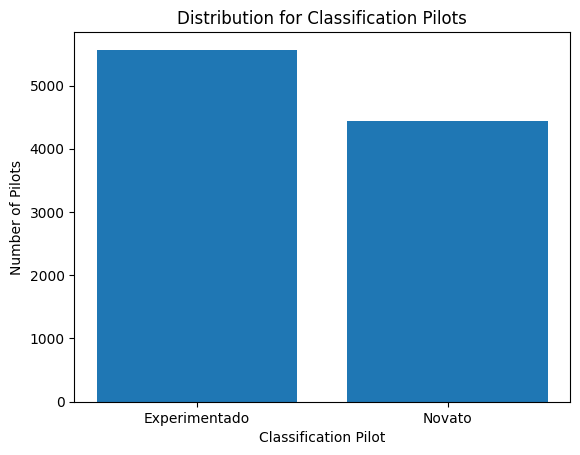

In [ ]:
# Count concurrence for column
clasificacion_counts = df['clasificacion_piloto'].value_counts()

# Create bars diagram
plt.bar(clasificacion_counts.index, clasificacion_counts.values)
plt.xlabel('Classification Pilot')
plt.ylabel('Number of Pilots')
plt.title('Distribution for Classification Pilots')
plt.show()

## Graficacion de los historigramas de las variables para encontrar balanceo o desvalanceo

array([[<Axes: title={'center': 'tiempo_promedio_vuelta'}>,
        <Axes: title={'center': 'velocidad_maxima'}>,
        <Axes: title={'center': 'velocidad_minima'}>,
        <Axes: title={'center': 'consistencia_tiempos_vuelta'}>],
       [<Axes: title={'center': 'anos_experiencia_f1'}>,
        <Axes: title={'center': 'carreras_completadas'}>,
        <Axes: title={'center': 'posicion_promedio_carreras'}>,
        <Axes: title={'center': 'numero_victorias'}>],
       [<Axes: title={'center': 'numero_incidentes_accidentes'}>,
        <Axes: title={'center': 'calidad_coche'}>,
        <Axes: title={'center': 'calidad_estrategia'}>,
        <Axes: title={'center': 'calidad_equipo'}>],
       [<Axes: title={'center': 'puntos'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

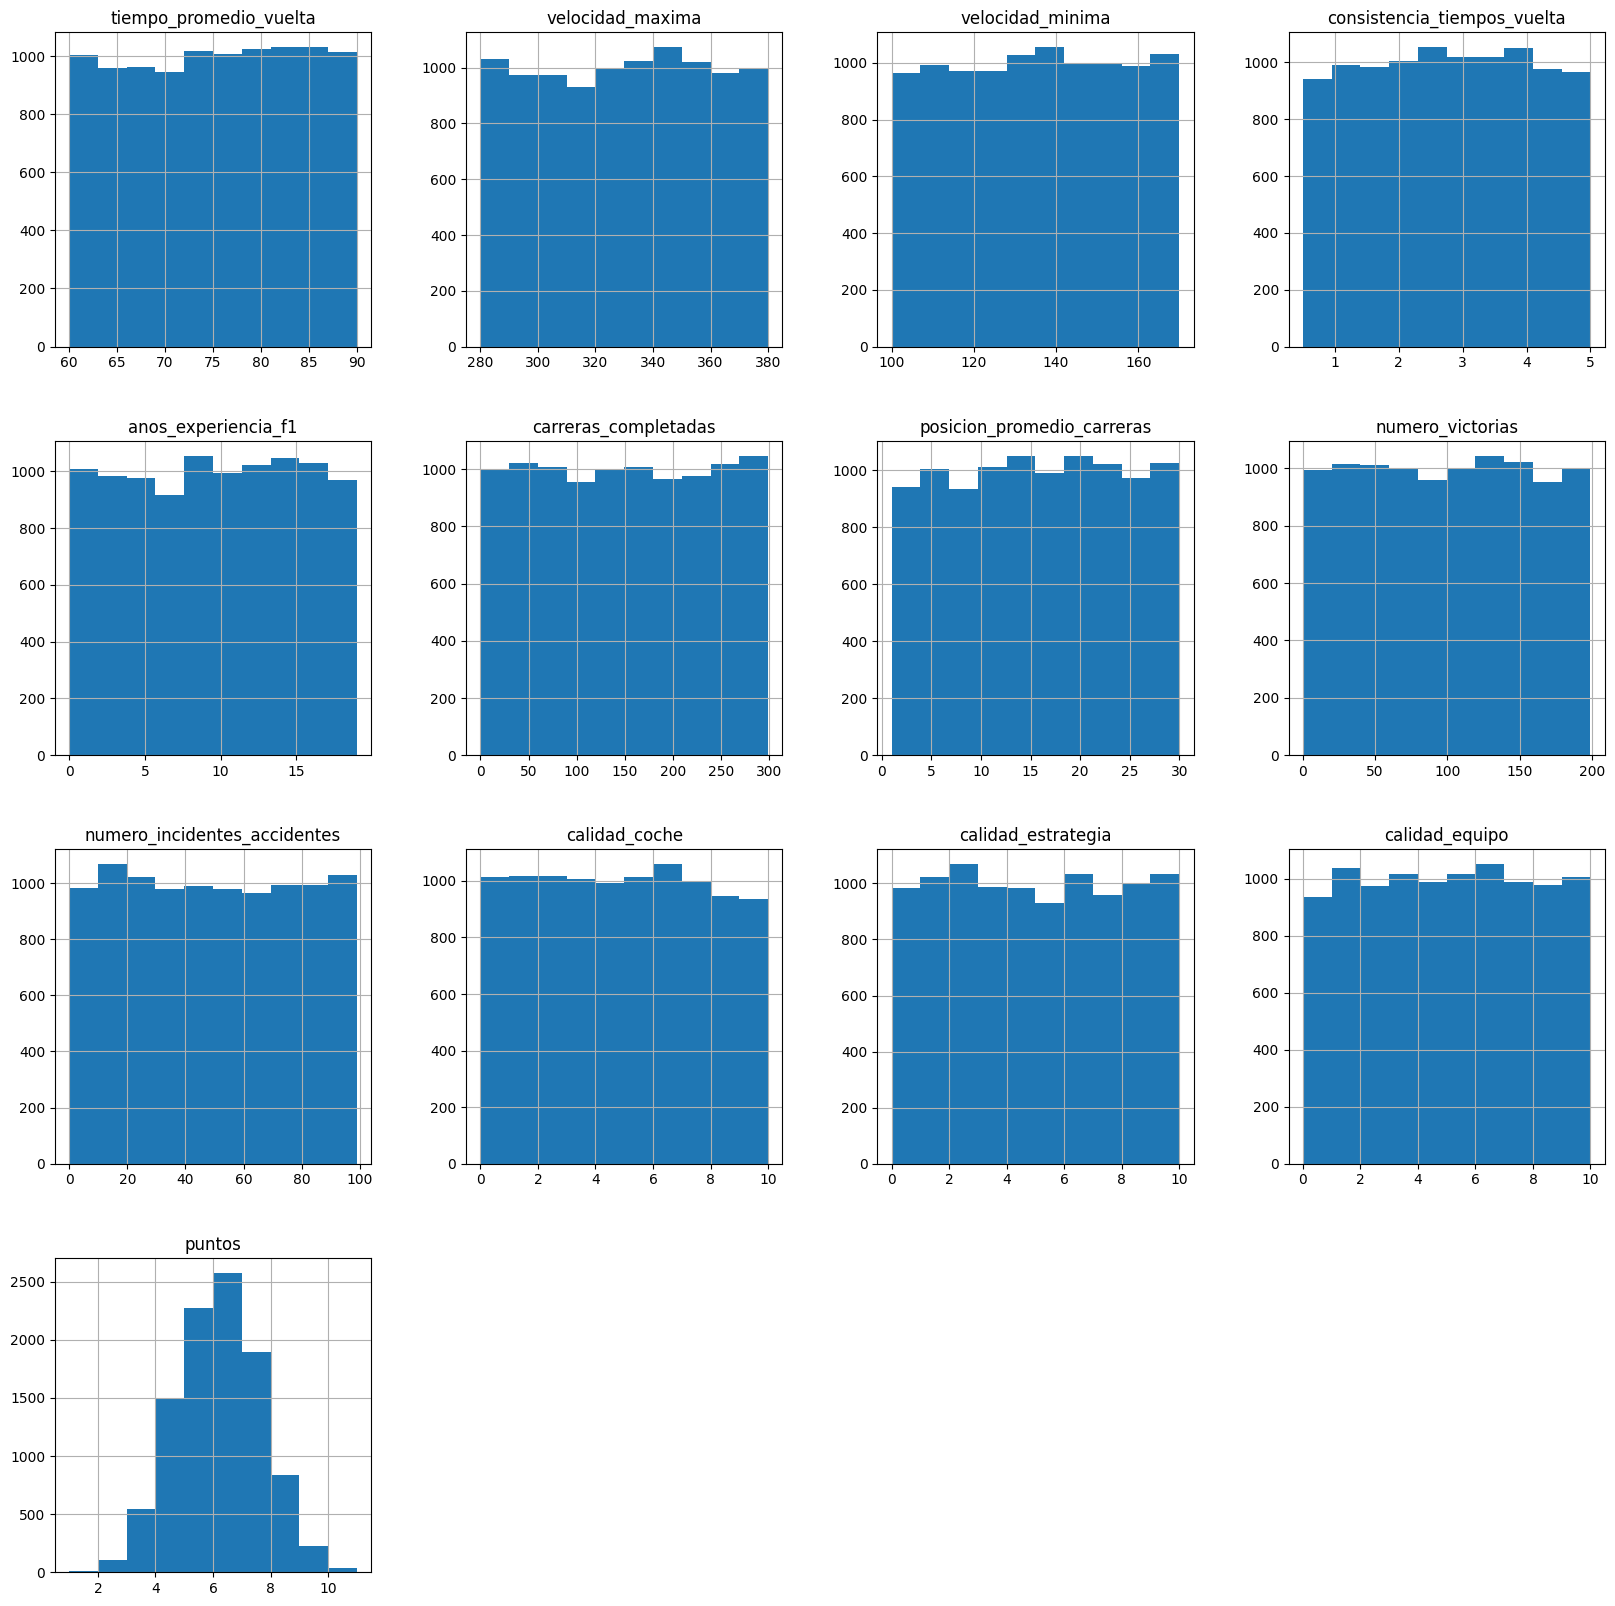

In [ ]:
# Create history diagrams
df.hist(figsize=(20,20))

## Informacion de nombres, tipos de datos y cantidad de datos del dataframe

In [ ]:
# View info data
# The vars in classification model using always numeric and float, if your vars using string changes vars to numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tiempo_promedio_vuelta        10000 non-null  float64
 1   velocidad_maxima              10000 non-null  float64
 2   velocidad_minima              10000 non-null  float64
 3   consistencia_tiempos_vuelta   10000 non-null  float64
 4   anos_experiencia_f1           10000 non-null  int64  
 5   carreras_completadas          10000 non-null  int64  
 6   posicion_promedio_carreras    10000 non-null  float64
 7   numero_victorias              10000 non-null  int64  
 8   numero_incidentes_accidentes  10000 non-null  int64  
 9   calidad_coche                 10000 non-null  float64
 10  calidad_estrategia            10000 non-null  float64
 11  calidad_equipo                10000 non-null  float64
 12  puntos                        10000 non-null  int64  
 13  cl

## Informacion de columnas del dataframe

In [ ]:
# Info columns
df.columns

Index(['tiempo_promedio_vuelta', 'velocidad_maxima', 'velocidad_minima',
       'consistencia_tiempos_vuelta', 'anos_experiencia_f1',
       'carreras_completadas', 'posicion_promedio_carreras',
       'numero_victorias', 'numero_incidentes_accidentes', 'calidad_coche',
       'calidad_estrategia', 'calidad_equipo', 'puntos',
       'clasificacion_piloto'],
      dtype='object')

## Conteo de clasificacion de novato o experimentado

In [ ]:
# Count value for classification pilots
df['clasificacion_piloto'].value_counts()

,count
clasificacion_piloto,
Experimentado,5566
Novato,4434


## Seleccion de variables

In [ ]:
# Select vars
# Features
features = [
       'tiempo_promedio_vuelta',
       'velocidad_maxima',
       'velocidad_minima',
       'consistencia_tiempos_vuelta',
       'anos_experiencia_f1',
       'carreras_completadas',
       'posicion_promedio_carreras',
       'numero_victorias',
       'numero_incidentes_accidentes',
       'calidad_coche',
       'calidad_estrategia',
       'calidad_equipo'
]

# Set in dataframe features
X = df[features]

# Set in dataframe predict
Y = df['clasificacion_piloto']

## Particion de datos de entrenamiento y prueba

In [ ]:
# Partition data for test and training
# Set for train 70% of data and 30% for test in literature is a good option for using
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Entrenamiento del modelo

In [ ]:
# Make classification
X, Y = make_classification(n_samples=10000, n_features=12, n_informative=10, n_redundant=0, random_state=0, shuffle=False)

# Randown Forest Classification
clf = RandomForestClassifier(max_depth=16, random_state=0, n_estimators=600, min_samples_leaf=10, min_samples_split=10, class_weight='balanced')

# Traint model
clf.fit(X_train, Y_train)

# Prediction
y_pred = clf.predict(X_test)

## Analisis de modelo

In [ ]:
# Evaluation model using classification repor and accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(Y_test, y_pred))

Accuracy: 0.949
               precision    recall  f1-score   support

Experimentado       0.97      0.94      0.95      1715
       Novato       0.93      0.96      0.94      1285

     accuracy                           0.95      3000
    macro avg       0.95      0.95      0.95      3000
 weighted avg       0.95      0.95      0.95      3000



# Análisis de Resultados del Modelo

## Métricas de Evaluación

El modelo ha sido evaluado con las siguientes métricas:

- **Accuracy**: **0.949**
- **Precisión, Recall, y F1-score** para cada clase:

```
| Clase         | Precisión | Recall | F1-score | Soporte |
|---------------|-----------|--------|----------|---------|
| Experimentado | 0.97      | 0.94   | 0.95     | 1715    |
| Novato        | 0.93      | 0.96   | 0.94     | 1285    |
```
- **Promedio Macro**:
  - Precisión: **0.95**
  - Recall: **0.95**
  - F1-score: **0.95**

- **Promedio Ponderado**:
  - Precisión: **0.95**
  - Recall: **0.95**
  - F1-score: **0.95**

## Análisis Detallado

1. **Accuracy (0.949)**:
 - El modelo tiene una **precisión general del 94.9%**, lo que indica que clasifica correctamente el 94.9% de las muestras en el conjunto de prueba. Esto refleja un alto nivel de precisión general.

2. **Precisión (0.97 para la Clase Experimentado, 0.93 para la Clase Novato)**:
 - Para la **Clase Experimentado**, la precisión es del **97%**, lo que significa que el modelo clasifica correctamente el 97% de las muestras como Experimentado.
 - Para la **Clase Novato**, la precisión es del **93%**, indicando que el modelo es igualmente efectivo, aunque ligeramente menos en clasificar las muestras de Novato correctamente.

3. **Recall (0.94 para la Clase Experimentado, 0.96 para la Clase Novato)**:
 - El **Recall** para la **Clase Experimentado** es del **94%**, lo que muestra que el modelo identifica correctamente el 94% de todas las muestras de Experimentado.
 - El **Recall** para la **Clase Novato** es del **96%**, indicando que el modelo es efectivo en identificar muestras de Novato con una tasa ligeramente superior a la de Experimentado.

4. **F1-score (0.95 para ambas clases)**:
 - El **F1-score** es la media armónica entre la precisión y el recall. Un **F1-score de 0.95** para ambas clases sugiere un equilibrio excelente entre precisión y recall para ambas categorías, reflejando un buen rendimiento general del modelo.

5. **Promedio Macro y Ponderado**:
 - **Promedio Macro**: Calcula el promedio de las métricas de precisión, recall y F1-score sin considerar el soporte (número de muestras por clase). El valor de **0.95** para todas las métricas indica que el modelo tiene un rendimiento consistente en ambas clases.
 - **Promedio Ponderado**: Considera el soporte de cada clase al calcular el promedio. El valor de **0.95** para las métricas indica que el rendimiento del modelo es robusto y consistente, incluso cuando se pondera por el número de muestras en cada clase.

## Conclusión

Los resultados muestran que el modelo tiene un rendimiento **excelente** con una alta **precisión**, **recall**, y **F1-score** en ambas clases. La alta **accuracy** y el equilibrio en las métricas de evaluación reflejan que el modelo es muy efectivo para la clasificación de pilotos en las categorías de **Novato** y **Experimentado**. Aunque el modelo ya presenta un rendimiento muy bueno, siempre es posible investigar y ajustar más para mejorar aún más la precisión, especialmente en contextos específicos o desbalanceados.



## Matris de Confusion

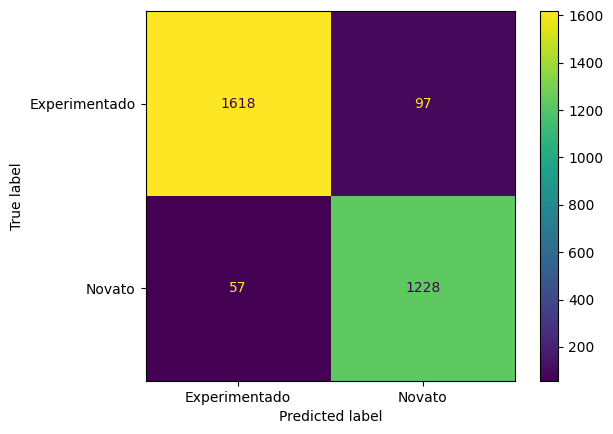

In [ ]:
# Matrix Confusion
# 0 is for Novate
# 1 is for Expert
cm = confusion_matrix(Y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Análisis de Resultados Clasificación de Pilotos de Fórmula 1

## Introducción

El objetivo de este análisis es evaluar la precisión del modelo de clasificación de pilotos de Fórmula 1 en dos categorías: Novato y Experimentado. El rendimiento del modelo se analiza a través de una matriz de confusión, la cual proporciona una visión detallada de cómo el modelo clasifica correctamente o incorrectamente a los pilotos en cada categoría.

## Resultados

En base a la matriz de confusión obtenida, se puede observar que el modelo muestra una alta precisión en la clasificación de los pilotos:

- **Clase Experimentado**:
  - Clasificaciones correctas: **1618**
  - Clasificaciones incorrectas: **97**

- **Clase Novato**:
  - Clasificaciones correctas: **1228**
  - Clasificaciones incorrectas: **57**


## Análisis de la Matriz de Confusión

La matriz de confusión revela cómo el modelo maneja los datos de cada piloto:

- Para la **Clase Experimentado**, el modelo logró **1618** clasificaciones correctas, con solo **97** errores. Esto significa que el modelo fue capaz de identificar correctamente a los pilotos experimentados en el **97%** de los casos.

- Para la **Clase Novato**, se obtuvieron **1228** clasificaciones correctas, con **57** errores, lo que representa una precisión del **93.4%** para esta categoría.

## Conclusión

El análisis demuestra que el modelo es eficiente en la clasificación de pilotos en las categorías de Novato y Experimentado, con un rendimiento altamente preciso. Sin embargo, el modelo no es perfecto, ya que presenta un margen de error en sus clasificaciones.

Específicamente, se estima que el modelo tiene una tasa de error del 4.91% en la clasificación de los pilotos, lo que indica que aún existe espacio para mejoras en la precisión del modelo para minimizar estos errores y mejorar la confiabilidad en la clasificación

## Grafiacion de la curva ROC para definir si el modelo es bueno o incongruente

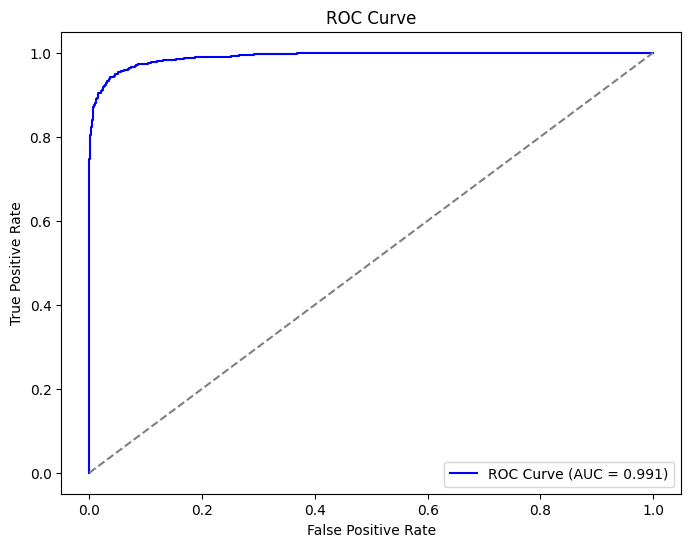

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Convert the labels to binary format
lb = LabelBinarizer()
Y_test_bin = lb.fit_transform(Y_test)

# Get prediction probabilities
y_probs = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test_bin, y_probs)

# Calculate the AUC
auc = roc_auc_score(Y_test_bin, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Reference line (AUC = 0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Analisis de la curva de ROC

## Introducción

La curva de características operativas del receptor (ROC, por sus siglas en inglés) es una herramienta fundamental en la evaluación de modelos de clasificación. Esta curva ilustra el rendimiento del modelo a través de diferentes umbrales de decisión, comparando la tasa de verdaderos positivos (sensibilidad) contra la tasa de falsos positivos (1 - especificidad). El área bajo la curva ROC (AUC) proporciona una medida cuantitativa de la capacidad del modelo para distinguir entre clases. Un AUC de 1.0 representa una clasificación perfecta, mientras que un AUC de 0.5 indica un rendimiento equivalente al azar.

## Análisis Detallado

En nuestro caso, la curva ROC muestra un desempeño sobresaliente del modelo, con un AUC de 0.991. Esto sugiere que el modelo tiene una excelente capacidad para diferenciar entre las clases de pilotos (Novato y Experimentado). Un AUC cercano a 1.0 indica que el modelo logra clasificar correctamente la mayoría de los casos positivos y negativos, con un margen mínimo de errores.

Al observar la curva ROC, se puede ver que se encuentra significativamente por encima de la línea diagonal que representa un rendimiento aleatorio. Esto refleja que el modelo tiene una alta tasa de verdaderos positivos y una baja tasa de falsos positivos en comparación con un clasificador aleatorio.

El área bajo la curva (AUC) de 0.991 también indica que el modelo tiene un margen muy pequeño de falsos positivos, lo cual es crucial para asegurar que los pilotos no sean incorrectamente clasificados como 'Experimentado' cuando en realidad no cumplen con todos los criterios de experiencia. Además, la alta tasa de verdaderos positivos garantiza que los pilotos que realmente tienen experiencia sean identificados con precisión.

## Conclusión

El análisis de la curva ROC muestra que nuestro modelo de clasificación tiene un rendimiento excelente, con un AUC de 0.991. Este resultado indica que el modelo es altamente efectivo en la clasificación de pilotos entre 'Novato' y 'Experimentado'. La capacidad del modelo para mantener una baja tasa de falsos positivos mientras maximiza la tasa de verdaderos positivos sugiere que se está cumpliendo el objetivo de la clasificación con un alto grado de precisión. Sin embargo, es importante seguir monitoreando y ajustando el modelo para asegurar que el rendimiento continúe siendo óptimo en diferentes conjuntos de datos y condiciones. La continua validación y ajuste del umbral de decisión pueden contribuir a mantener la robustez del modelo frente a variaciones en los datos.

## Probando el modelo entrenado

In [ ]:
# Data for the new pilot
novate = {
    "tiempo_promedio_vuelta": 101.0,       # Tiempo más alto, menos competitivo
    "velocidad_maxima": 290.0,            # Velocidad menor
    "velocidad_minima": 90.0,            # Velocidad menor
    "consistencia_tiempos_vuelta": 5.0,   # Menos consistente
    "anos_experiencia_f1": 1,             # Poca experiencia
    "carreras_completadas": 5,           # Pocas carreras
    "posicion_promedio_carreras": 25.0,   # Mala posición promedio
    "numero_victorias": 1,                # Pocas victorias
    "numero_incidentes_accidentes": 4,   # Muchos incidentes
    "calidad_coche": 4.0,                 # Coche de calidad media
    "calidad_estrategia": 3.0,            # Estrategia baja
    "calidad_equipo": 4.0                 # Equipo de calidad media
}

# Crear un DataFrame con un piloto Experimentado
experienced = {
    "tiempo_promedio_vuelta": 65.0,       # Tiempo bajo, más competitivo
    "velocidad_maxima": 350.0,            # Alta velocidad
    "velocidad_minima": 140.0,            # Alta velocidad
    "consistencia_tiempos_vuelta": 1.5,   # Muy consistente
    "anos_experiencia_f1": 10,            # Mucha experiencia
    "carreras_completadas": 250,          # Muchas carreras
    "posicion_promedio_carreras": 3.0,    # Buena posición promedio
    "numero_victorias": 50,               # Muchas victorias
    "numero_incidentes_accidentes": 2,    # Pocos incidentes
    "calidad_coche": 9.0,                 # Coche de alta calidad
    "calidad_estrategia": 9.0,            # Estrategia alta
    "calidad_equipo": 9.0                 # Equipo de alta calidad
}

# Convert in dataframe
new_pilot_df = pd.DataFrame([novate])

# Get prediction
prediction = clf.predict(new_pilot_df)[0]

# View prediction with base tag
print(f"Clasificacion para el nuevo piloto: {prediction}")

Clasificacion para el nuevo piloto: Novato
